Lambda School Data Science

*Unit 2, Sprint 3, Module 2*

---


# Wrangle ML datasets

- [x] Continue to clean and explore your data. 
- [x] For the evaluation metric you chose, what score would you get just by guessing?
- [x] Can you make a fast, first model that beats guessing?

**We recommend that you use your portfolio project dataset for all assignments this sprint.**

**But if you aren't ready yet, or you want more practice, then use the New York City property sales dataset for today's assignment.** Follow the instructions below, to just keep a subset for the Tribeca neighborhood, and remove outliers or dirty data. [Here's a video walkthrough](https://youtu.be/pPWFw8UtBVg?t=584) you can refer to if you get stuck or want hints!

- Data Source: [NYC OpenData: NYC Citywide Rolling Calendar Sales](https://data.cityofnewyork.us/dataset/NYC-Citywide-Rolling-Calendar-Sales/usep-8jbt)
- Glossary: [NYC Department of Finance: Rolling Sales Data](https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page)

In [1]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'
    !pip install category_encoders==2.*
    !pip install pandas-profiling==2.*

# If you're working locally:
else:
    DATA_PATH = 'C:/Users/sahmj/datasets/'
    !pip install category_encoders==2.*
    !pip install pandas-profiling==2.*
    !pip install plotly==4.9.0

In [2]:
# Imports:
import pandas as pd
import pandas_profiling
from pandas_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [3]:
# Read in my datasets:
train = pd.read_csv(DATA_PATH+'ufo_train.csv')
test = pd.read_csv(DATA_PATH+'ufo_test.csv')

C:\Users\sahmj\OneDrive\Documents\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Your code starts here:

In [4]:
#Look at my train set:
print (train.shape)
train.head()

(67618, 45)


,city,state,country,duration (seconds),latitude,longitude,shape_class,year,month,day,...,star,stationary,stopped,straight,trail,west,changes,color,vanishes,follows
0,San Marcos,TX,United States,2700,29.883056,-97.941111,3D,1949,10,10,...,0,0,0,0,0,0,0,0,0,0
1,Lackland Afb,TX,United States,7200,29.384210,-98.581082,Type of Light,1949,10,10,...,0,0,0,0,0,0,0,0,0,0
2,Chester (Uk/England),0,United Kingdom,20,53.200000,-2.916667,Circular,1955,10,10,...,0,0,0,0,0,0,0,2,0,0
3,Edna,TX,United States,20,28.978333,-96.645833,Circular,1956,10,10,...,0,0,0,0,0,0,0,0,0,0
4,Kaneohe,HI,United States,900,21.418056,-157.803611,Type of Light,1960,10,10,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Look at my test set:
print (test.shape)
test.head()

(16552, 45)


,city,state,country,duration (seconds),latitude,longitude,shape_class,year,month,day,...,star,stationary,stopped,straight,trail,west,changes,color,vanishes,follows
0,Bridgeport,CT,United States,630.0,41.166944,-73.205278,Circular,2012,10,10,...,0,0,0,0,0,0,0,0,0,0
1,San Francisco Airport,CA,0,300.0,37.615223,-122.389979,Polygon,2012,10,10,...,0,0,0,0,0,0,0,0,0,0
2,San Diego,CA,United States,240.0,32.715278,-117.156389,Circular,2012,10,10,...,0,0,0,0,0,0,0,1,0,0
3,Sterling Heights,MI,United States,120.0,42.580278,-83.030278,Circular,2012,10,10,...,0,0,0,0,0,0,0,1,0,0
4,Syracuse,NY,United States,900.0,43.048056,-76.147778,Type of Light,2012,10,10,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Look at a list of the column names:
train.columns

Index(['city', 'state', 'country', 'duration (seconds)', 'latitude',
       'longitude', 'shape_class', 'year', 'month', 'day', 'hour', 'dow',
       'clear', 'craft', 'dark', 'east', 'faded', 'fast', 'formation', 'high',
       'hoax', 'horizon', 'long', 'low', 'moves', 'north', 'pattern',
       'quickly', 'single', 'slow', 'small', 'solid', 'sound', 'south',
       'speed', 'star', 'stationary', 'stopped', 'straight', 'trail', 'west',
       'changes', 'color', 'vanishes', 'follows'],
      dtype='object')

In [7]:
# Change column names: replace spaces with underscores:
# Only have one that has a space, removing () also: 
train = train.rename(columns={'duration (seconds)': 'durations_in_secs'})
test = test.rename(columns={'duration (seconds)': 'durations_in_secs'})

# Rearrange columns:
train = train[['latitude', 'longitude', 'city', 'state', 'country', 'year', 'month', 'day', 'dow', 'hour',
               'durations_in_secs', 'hoax', 'craft', 'north', 'south', 'east', 'west', 'color', 'clear', 'dark', 
               'faded', 'pattern', 'formation', 'single', 'trail', 'moves', 'follows', 'straight', 'changes', 
               'vanishes', 'quickly', 'fast', 'slow', 'stationary', 'stopped', 'high', 'low', 'horizon', 'solid', 
               'star', 'long', 'small', 'speed', 'sound', 'shape_class']]
test = test[['latitude', 'longitude', 'city', 'state', 'country', 'year', 'month', 'day', 'dow', 'hour',
               'durations_in_secs', 'hoax', 'craft', 'north', 'south', 'east', 'west', 'color', 'clear', 'dark', 
               'faded', 'pattern', 'formation', 'single', 'trail', 'moves', 'follows', 'straight', 'changes', 
               'vanishes', 'quickly', 'fast', 'slow', 'stationary', 'stopped', 'high', 'low', 'horizon', 'solid', 
               'star', 'long', 'small', 'speed', 'sound', 'shape_class']]

# Check my work:
train.columns

Index(['latitude', 'longitude', 'city', 'state', 'country', 'year', 'month',
       'day', 'dow', 'hour', 'durations_in_secs', 'hoax', 'craft', 'north',
       'south', 'east', 'west', 'color', 'clear', 'dark', 'faded', 'pattern',
       'formation', 'single', 'trail', 'moves', 'follows', 'straight',
       'changes', 'vanishes', 'quickly', 'fast', 'slow', 'stationary',
       'stopped', 'high', 'low', 'horizon', 'solid', 'star', 'long', 'small',
       'speed', 'sound', 'shape_class'],
      dtype='object')

In [8]:
# Get Pandas Profiling Report:
profile = ProfileReport(train, minimal=True)
profile

In [9]:
# Find out why durations in secs is not supported in the profile:
train['durations_in_secs'].dtypes

dtype('O')

In [10]:
# # Show max rows:
# pd.set_option('display.max_rows', None)

# Look at the value counts:
train['durations_in_secs'].value_counts()

300.0      3463
0          3197
300        3024
120.0      2810
600.0      2554
           ... 
18300.0       1
1935.0        1
1186          1
46800.0       1
1351.0        1
Name: durations_in_secs, Length: 648, dtype: int64

In [11]:
# Need to replace values first that have typos:
train['durations_in_secs'].replace(['2`', '8`', '0.5`'], [2, 8, 0.5], inplace=True)

# Format the values to floats and all have 1 decimal place:
train['durations_in_secs'] = train['durations_in_secs'].astype(float).round(decimals=1)



# Check my work
train['durations_in_secs'].dtypes

dtype('float64')

In [12]:
train['durations_in_secs'].value_counts()

300.0        6487
120.0        5359
600.0        4787
60.0         4545
0.0          4544
             ... 
2419200.0       1
355.0           1
688.0           1
5263200.0       1
4560.0          1
Name: durations_in_secs, Length: 454, dtype: int64

In [13]:
# Look at rows where there is a 0 in the city column:
train_city = train[train['city'] == '0']
train_city

# Need to drop rows that have a 0 in the city column - they do not add any value:
train.drop(train_city.index, inplace=True)

# Check my work:
print (train.shape)
train['city'].value_counts()

(63086, 45)


Seattle                                         446
Phoenix                                         383
Los Angeles                                     303
Portland                                        292
Las Vegas                                       291
                                               ... 
Leduc (Canada)                                    1
Roby                                              1
Chawton (A Village) (Hampshire) (Uk/England)      1
Listowel (Canada)                                 1
Kersey                                            1
Name: city, Length: 17629, dtype: int64

In [14]:
# Look at rows where there is a 0 in the city column:
test_city = test[test['city'] == '0']
test_city

# No need to drop any rows here.

,latitude,longitude,city,state,country,year,month,day,dow,hour,...,high,low,horizon,solid,star,long,small,speed,sound,shape_class


In [15]:
# Look at the value counts in the country column:
train['country'].value_counts()

United States     51737
0                  5767
Canada             2599
United Kingdom     1857
Australia           497
                  ...  
Dubai                 1
Honduras              1
Canary Islands        1
Ghana                 1
Corsica               1
Name: country, Length: 124, dtype: int64

In [16]:
# Look at all country rows with 0:
train[train['country'] == '0']

,latitude,longitude,city,state,country,year,month,day,dow,hour,...,high,low,horizon,solid,star,long,small,speed,sound,shape_class
18,32.364167,-64.678611,Bermuda Nas,0,0,1973,10,10,Wed,23,...,0,0,0,0,0,0,0,0,0,Type of Light
437,-33.137551,81.826172,Indian Ocean (Usn Vessel),0,0,1970,10,1,Thr,23,...,0,0,0,0,0,0,0,0,0,Type of Light
810,40.183333,44.516667,Yerevan (Armenia),0,0,2008,10,1,Wed,21,...,0,0,0,0,0,0,0,0,0,Other
1103,25.566699,-108.467305,Guasave Sinaloa,0,0,2003,10,13,Mon,12,...,0,0,0,0,0,0,0,0,0,Multiple
1444,-8.783195,-124.508523,Pacific Ocean (1500Mi.Sw Of U.S.Mainland),0,0,1968,10,15,Tue,21,...,0,0,0,0,0,0,0,0,0,Circular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65725,38.683727,-77.260261,Occoquan,0,0,2011,9,26,Mon,21,...,0,0,0,0,0,0,0,0,0,Multiple
67266,47.606210,-122.332071,Seattle To Tokyo (2 Nwa Flt 007),0,0,1996,9,8,Sun,0,...,0,0,0,0,0,0,0,0,0,Circular
67461,20.422984,-86.922343,Cozumel (Mexico) And Ocho Rios (Jamaica) (Betw...,0,0,1999,9,9,Thr,23,...,0,0,0,0,0,0,0,0,0,Polygon
67516,40.712784,-74.005941,Whangarei (New Zealand),NY,0,2004,9,9,Thr,15,...,0,0,0,0,0,0,0,0,0,Other


In [17]:
# Seems that most of the countries where a state is listed is in the US:
# Look at those first:
states = train[(train['country'] == '0') & (train['state'] != '0')]
print (states.shape)
states

(3689, 45)


,latitude,longitude,city,state,country,year,month,day,dow,hour,...,high,low,horizon,solid,star,long,small,speed,sound,shape_class
3911,55.779431,-132.817995,Prince Of Wales Island,AK,0,1995,10,27,Fri,20,...,0,0,0,0,0,0,0,0,0,Other
6551,64.837778,-147.716389,Fairbanks&#44 Trans Alaskan Pipeline Haul Road...,AK,0,1976,1,11,Sun,23,...,0,0,0,0,0,0,0,0,1,Other
6783,56.600000,-169.541667,St. George Island,AK,0,2004,1,11,Sun,19,...,0,0,0,0,0,0,0,0,0,Type of Light
10775,43.095526,-86.184076,Spring Lake/Grand Haven,MI,0,2008,11,28,Fri,23,...,0,1,0,0,0,0,0,0,1,Parallelogram
10806,36.152638,-80.362275,Pfafftown,NC,0,2011,11,28,Mon,21,...,0,0,0,0,0,0,0,0,0,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58717,41.680588,-87.835328,Palos,IL,0,2009,8,23,Sun,16,...,0,0,0,0,0,0,0,0,0,Circular
59885,56.600000,-169.541667,St. George Island,AK,0,2002,8,30,Fri,23,...,0,0,0,0,0,0,0,0,0,Other
61080,60.554444,-151.258333,North Kenai (Daniels Lake; East End),AK,0,2010,8,7,Sat,0,...,0,0,0,0,0,0,0,0,0,Type of Light
63302,59.878522,-150.395227,Kenai Peninsula,AK,0,2007,9,15,Sat,2,...,0,0,0,0,0,0,0,0,0,Polygon


In [18]:
# Look at values for Alaska only:
ak = train[train['state'] == 'AK']
print (ak.shape)

(235, 45)


In [19]:
# Replace some values that have 0 in county column:
train.loc[13342, 'country'] = 'Netherlands'
train.loc[13341:13343, :]

,latitude,longitude,city,state,country,year,month,day,dow,hour,...,high,low,horizon,solid,star,long,small,speed,sound,shape_class
13341,32.715278,-117.156389,San Diego,CA,United States,2006,11,8,Wed,17,...,0,0,0,0,0,0,0,0,0,Type of Light
13342,52.350785,5.264702,Almere (Netherlands),FL,Netherlands,2006,1,18,Wed,18,...,0,0,0,0,0,0,0,0,0,Other
13343,36.600278,-121.893611,Monterey,CA,United States,2006,11,8,Wed,18,...,0,0,0,0,0,0,0,0,0,Circular


In [20]:
# Replace some values that have 0 in county column:
train.loc[15613, 'country'] = 'Portugal'
train.loc[15612:15614, :]

,latitude,longitude,city,state,country,year,month,day,dow,hour,...,high,low,horizon,solid,star,long,small,speed,sound,shape_class
15612,38.572222,-94.878889,Paola,KS,United States,2004,12,15,Wed,9,...,0,0,0,0,0,0,0,0,0,Polygon
15613,39.320980,-111.093731,Lajes Air Force Base (Portugal),UT,Portugal,2004,12,15,Wed,9,...,0,1,0,0,0,0,0,0,0,Circular
15614,27.947222,-82.458611,Tampa,FL,United States,2004,12,15,Wed,14,...,0,0,0,0,0,0,0,0,0,Parallelogram


In [21]:
# Replace some values that have 0 in county column:
train.loc[(train['state'] == 'PR'), 'country'] = 'Puerto Rico'
train.loc[(train['state'] == 'PR'), :]

,latitude,longitude,city,state,country,year,month,day,dow,hour,...,high,low,horizon,solid,star,long,small,speed,sound,shape_class
261,18.446389,-66.388056,Vega Baja (Puerto Rico),PR,Puerto Rico,1998,10,11,Sun,14,...,0,0,0,0,0,0,0,0,0,Non-Geometric
6039,18.191389,-65.961389,San Lorenzo (Puerto Rico),PR,Puerto Rico,1999,1,10,Sun,1,...,0,0,0,0,0,0,0,0,0,Multiple
6746,17.967778,-66.061667,Arroyo (Puerto Rico),PR,Puerto Rico,2002,11,1,Fri,23,...,0,0,0,0,1,0,0,0,0,Polygon
7537,18.396667,-67.113611,Moca (Puerto Rico),PR,Puerto Rico,1989,11,15,Wed,23,...,0,0,0,0,0,0,0,0,0,Other
17450,18.346111,-66.048611,Cupey (San Juan&#44 Puerto Rico),PR,Puerto Rico,1999,12,24,Fri,23,...,0,0,0,0,1,0,0,1,0,Circular
18713,18.413611,-66.082222,Puerto Nuevo (Puerto Rico),PR,Puerto Rico,1997,12,31,Wed,21,...,0,0,0,0,0,0,0,0,0,Non-Geometric
21410,18.013056,-66.614444,Ponce (Puerto Rico),PR,Puerto Rico,1974,1,31,Thr,15,...,0,0,0,0,0,0,0,0,0,Circular
21418,18.474444,-66.716111,Arecibo (Just S Of&#44 Rural Central Pr),PR,Puerto Rico,1998,1,31,Sat,18,...,0,0,0,0,0,0,0,0,0,Circular
25273,18.218567,-66.591562,Jayuya (Puerto Rico) ?,PR,Puerto Rico,1998,2,22,Sun,23,...,0,0,0,0,0,0,0,0,0,Type of Light
27909,18.456131,-67.022630,Isabela (Puerto Rico) ?,PR,Puerto Rico,2000,3,1,Wed,20,...,0,0,0,0,0,0,0,0,0,Multiple


In [22]:
# Replace some values that have 0 in county column:
train.loc[26629, 'country'] = 'Italy'
train.loc[26628:26630, :]

,latitude,longitude,city,state,country,year,month,day,dow,hour,...,high,low,horizon,solid,star,long,small,speed,sound,shape_class
26628,39.881389,-83.093056,Grove City,OH,United States,2010,2,4,Thr,9,...,0,0,0,0,0,0,0,0,0,Circular
26629,37.617495,15.024093,Nicolosi&#44 Sicily (Italy; Mt. Etna),TN,Italy,2010,2,4,Thr,15,...,0,0,0,0,0,0,0,0,0,Other
26630,41.850000,-87.650000,Chicago,IL,United States,2010,2,4,Thr,18,...,0,0,0,0,0,0,0,0,0,Circular


In [23]:
# Replace some values that have 0 in county column:
train.loc[27079, 'country'] = 'Brazil'
train.loc[27078:27080, :]

,latitude,longitude,city,state,country,year,month,day,dow,hour,...,high,low,horizon,solid,star,long,small,speed,sound,shape_class
27078,49.134393,-123.108174,Rochdale (Canada),BC,0,2010,2,7,Sun,23,...,0,0,0,0,0,0,0,0,0,Type of Light
27079,46.729553,-94.685900,Piranguinho (Brazil),MN,Brazil,2011,2,7,Mon,3,...,1,0,0,0,0,0,0,1,0,Type of Light
27080,47.253056,-122.443056,Tacoma,WA,United States,2011,2,7,Mon,16,...,0,0,0,0,0,0,0,0,0,Circular


In [24]:
# Change all values in coutry where state == val:
train.loc[(train['state'] == 'AK') & (train['country'] == 'United States'), 'country'] = 'Alaska'
train.loc[(train['state'] == 'AK') & (train['country'] == '0'), 'country'] = 'Alaska'
train.loc[(train['state'] == 'HI') & (train['country'] == 'United States'), 'country'] = 'Hawaii'
train.loc[(train['state'] == 'HI') & (train['country'] == '0'), 'country'] = 'Hawaii'
train.loc[(train['state'] == 'BC') & (train['country'] == '0'), 'country'] = 'Canada'
train.loc[(train['state'] == 'NF') & (train['country'] == '0'), 'country'] = 'Canada'
train.loc[(train['state'] == 'ON') & (train['country'] == '0'), 'country'] = 'Canada'
train.loc[(train['state'] == 'AB') & (train['country'] == '0'), 'country'] = 'Canada'
train.loc[(train['state'] == 'PE') & (train['country'] == '0'), 'country'] = 'Canada'
train.loc[(train['state'] == 'PQ') & (train['country'] == '0'), 'country'] = 'Canada'
train.loc[(train['state'] == 'MB') & (train['country'] == '0'), 'country'] = 'Canada'
train.loc[(train['state'] == 'QC') & (train['country'] == '0'), 'country'] = 'Canada'
train.loc[(train['state'] == 'NT') & (train['country'] == '0'), 'country'] = 'Canada'
train.loc[(train['state'] == 'SK') & (train['country'] == '0'), 'country'] = 'Canada'
train.loc[(train['state'] == 'NS') & (train['country'] == '0'), 'country'] = 'Canada'
train.loc[(train['state'] == 'NB') & (train['country'] == '0'), 'country'] = 'Canada'

# Check my work:
train['country'].value_counts().head(10)

United States     51307
0                  5370
Canada             2905
United Kingdom     1857
Australia           497
Hawaii              250
Alaska              235
Germany              95
Mexico               54
India                43
Name: country, dtype: int64

In [25]:
# Change all values in coutry where state == val:
test.loc[(test['state'] == 'AK') & (test['country'] == 'United States'), 'country'] = 'Alaska'
test.loc[(test['state'] == 'AK') & (test['country'] == '0'), 'country'] = 'Alaska'
test.loc[(test['state'] == 'HI') & (test['country'] == 'United States'), 'country'] = 'Hawaii'
test.loc[(test['state'] == 'HI') & (test['country'] == '0'), 'country'] = 'Hawaii'
test.loc[(test['state'] == 'BC') & (test['country'] == '0'), 'country'] = 'Canada'
test.loc[(test['state'] == 'NF') & (test['country'] == '0'), 'country'] = 'Canada'
test.loc[(test['state'] == 'ON') & (test['country'] == '0'), 'country'] = 'Canada'
test.loc[(test['state'] == 'AB') & (test['country'] == '0'), 'country'] = 'Canada'
test.loc[(test['state'] == 'PE') & (test['country'] == '0'), 'country'] = 'Canada'
test.loc[(test['state'] == 'PQ') & (test['country'] == '0'), 'country'] = 'Canada'
test.loc[(test['state'] == 'MB') & (test['country'] == '0'), 'country'] = 'Canada'
test.loc[(test['state'] == 'QC') & (test['country'] == '0'), 'country'] = 'Canada'
test.loc[(test['state'] == 'NT') & (test['country'] == '0'), 'country'] = 'Canada'
test.loc[(test['state'] == 'SK') & (test['country'] == '0'), 'country'] = 'Canada'
test.loc[(test['state'] == 'NS') & (test['country'] == '0'), 'country'] = 'Canada'
test.loc[(test['state'] == 'NB') & (test['country'] == '0'), 'country'] = 'Canada'

# Check my work:
test['country'].value_counts().head(10)

United States     14080
0                  1378
Canada              659
United Kingdom      150
Alaska              110
Hawaii               99
Australia            63
Germany              13
Name: country, dtype: int64

In [26]:
# Look at the rows that still have 0 in the country column and a value in state column:
train[(train['country'] == '0') & (train['state'] != '0')]

,latitude,longitude,city,state,country,year,month,day,dow,hour,...,high,low,horizon,solid,star,long,small,speed,sound,shape_class
10775,43.095526,-86.184076,Spring Lake/Grand Haven,MI,0,2008,11,28,Fri,23,...,0,1,0,0,0,0,0,0,1,Parallelogram
10806,36.152638,-80.362275,Pfafftown,NC,0,2011,11,28,Mon,21,...,0,0,0,0,0,0,0,0,0,Other
10878,46.853704,-121.758950,Mt. Rainier National Park,WA,0,1978,11,29,Wed,3,...,0,0,0,0,0,0,0,0,0,Other
10885,48.633082,-122.928982,Orcas Island,WA,0,1997,11,29,Sat,18,...,0,0,0,0,0,0,0,0,0,Type of Light
10889,35.149534,-90.048980,West Memphis,AR,0,1998,11,29,Sun,19,...,0,0,0,0,0,0,0,0,0,Polygon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58595,38.168942,-86.989997,Dale Ville,IN,0,1997,8,23,Sat,11,...,0,0,0,0,0,0,0,0,0,Polygon
58641,25.981202,-80.148379,Hallandale,FL,0,2003,8,23,Sat,18,...,0,0,0,0,0,0,0,0,0,Circular
58684,31.195001,-97.741314,Fort Hood,TX,0,2007,8,23,Thr,21,...,0,0,0,0,0,0,0,0,0,Type of Light
58717,41.680588,-87.835328,Palos,IL,0,2009,8,23,Sun,16,...,0,0,0,0,0,0,0,0,0,Circular


In [27]:
# Replace some values that have 0 in county column and value in state by not a US state:
train.loc[[22522, 32476, 38798], 'country'] = 'India'
train.loc[29234, 'country'] = 'Venezuela'
train.loc[31136, 'country'] = 'United Arab Emirates'
train.loc[34726, 'country'] = 'Australia'
train.loc[[37705, 47440, 47977, 55403, 57338], 'country'] = 'Canada'
train.loc[42292, 'country'] = 'Yugoslavia'
train.loc[55455, 'country'] = 'Germany'
train.loc[67516, 'country'] = 'New Zealand'

In [28]:
# Check my work:
train['country'].value_counts().head(10)

United States     51307
0                  5356
Canada             2910
United Kingdom     1857
Australia           498
Hawaii              250
Alaska              235
Germany              96
Mexico               54
India                46
Name: country, dtype: int64

In [29]:
# Rename all 0 country values with United States if there is a value in the state column:
train.loc[(train['state'] != '0') & (train['country'] == '0'), 'country'] = 'United States'

# Check my work:
train['country'].value_counts().head(10)

United States     54585
Canada             2910
0                  2078
United Kingdom     1857
Australia           498
Hawaii              250
Alaska              235
Germany              96
Mexico               54
India                46
Name: country, dtype: int64

In [30]:
# Look at the rows that still have 0 in the country column:
train[train['country'] == '0']

,latitude,longitude,city,state,country,year,month,day,dow,hour,...,high,low,horizon,solid,star,long,small,speed,sound,shape_class
18,32.364167,-64.678611,Bermuda Nas,0,0,1973,10,10,Wed,23,...,0,0,0,0,0,0,0,0,0,Type of Light
437,-33.137551,81.826172,Indian Ocean (Usn Vessel),0,0,1970,10,1,Thr,23,...,0,0,0,0,0,0,0,0,0,Type of Light
810,40.183333,44.516667,Yerevan (Armenia),0,0,2008,10,1,Wed,21,...,0,0,0,0,0,0,0,0,0,Other
1103,25.566699,-108.467305,Guasave Sinaloa,0,0,2003,10,13,Mon,12,...,0,0,0,0,0,0,0,0,0,Multiple
1444,-8.783195,-124.508523,Pacific Ocean (1500Mi.Sw Of U.S.Mainland),0,0,1968,10,15,Tue,21,...,0,0,0,0,0,0,0,0,0,Circular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64559,19.322170,-81.240869,Grand Cayman (Offshore),0,0,2006,9,21,Thr,4,...,0,0,0,0,0,0,0,0,0,Type of Light
65725,38.683727,-77.260261,Occoquan,0,0,2011,9,26,Mon,21,...,0,0,0,0,0,0,0,0,0,Multiple
67266,47.606210,-122.332071,Seattle To Tokyo (2 Nwa Flt 007),0,0,1996,9,8,Sun,0,...,0,0,0,0,0,0,0,0,0,Circular
67461,20.422984,-86.922343,Cozumel (Mexico) And Ocho Rios (Jamaica) (Betw...,0,0,1999,9,9,Thr,23,...,0,0,0,0,0,0,0,0,0,Polygon


In [31]:
# Look at the rows that still have 0 in the country column and a value in state column:
test[(test['country'] == '0') & (test['state'] != '0')]

,latitude,longitude,city,state,country,year,month,day,dow,hour,...,high,low,horizon,solid,star,long,small,speed,sound,shape_class
1,37.615223,-122.389979,San Francisco Airport,CA,0,2012,10,10,Wed,15,...,0,0,0,0,0,0,0,0,0,Polygon
20,40.858433,-74.163755,Clifton,NJ,0,2013,10,10,Thr,0,...,0,0,0,0,0,0,0,0,0,Type of Light
22,36.864209,-86.710273,Aurburn,KY,0,2013,10,10,Thr,5,...,0,0,0,0,0,0,0,0,0,Polygon
40,40.695655,-73.325675,Bablyon,NY,0,2012,10,11,Thr,7,...,0,0,0,0,0,0,0,0,0,Circular
58,39.103118,-84.512020,North Cincinnati,OH,0,2013,10,11,Fri,19,...,0,0,0,0,1,0,0,0,0,Type of Light
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16489,38.013059,-78.393305,Charlottesville/Shadwell,VA,0,2012,9,8,Sat,23,...,0,0,0,0,0,0,0,0,0,Type of Light
16498,27.273049,-80.358226,Pt. St Lucie,FL,0,2013,9,8,Sun,20,...,0,0,0,0,0,0,0,0,0,Non-Geometric
16503,47.644539,-122.694870,Silveradale,WA,0,2013,9,8,Sun,21,...,0,0,0,0,0,0,0,0,0,Circular
16539,40.858433,-74.163755,Clifton,NJ,0,2013,9,9,Mon,20,...,0,0,0,0,0,0,0,0,0,Other


In [32]:
# Rename all 0 country values with United States if there is a value in the state column:
test.loc[(test['state'] != '0') & (test['country'] == '0'), 'country'] = 'United States'

# Check my work:
test['country'].value_counts().head(10)

United States     15053
Canada              659
0                   405
United Kingdom      150
Alaska              110
Hawaii               99
Australia            63
Germany              13
Name: country, dtype: int64

In [33]:
# Only going to use only United States, Canada, Alaska, and Hawaii:
train['n_america'] = train['country']
include = ['United States', 'Canada', 'Alaska', 'Hawaii']
train[~train['n_america'].isin(include)] = 'Other'

# Check my work:
train['n_america'].value_counts()

United States    54585
Other             5106
Canada            2910
Hawaii             250
Alaska             235
Name: n_america, dtype: int64

In [34]:
# Only going to use only United States, Canada, Alaska, and Hawaii:
test['n_america'] = test['country']
include = ['United States', 'Canada', 'Alaska', 'Hawaii']
test[~test['n_america'].isin(include)] = 'Other'

# Check my work:
test['n_america'].value_counts()

United States    15053
Canada             659
Other              631
Alaska             110
Hawaii              99
Name: n_america, dtype: int64

In [35]:
# Look at shape before dropping rows:
print ('Before dropping rows =', train.shape)

# Remove all rows where other is in n_america:
train_c_other = train[train['n_america'] == 'Other']
train.drop(train_c_other.index, inplace=True)

# Check my work:
print ('After dropping rows =', train.shape)

Before dropping rows = (63086, 46)
After dropping rows = (57980, 46)


In [36]:
# Look at shape before dropping rows:
print ('Before dropping rows =', test.shape)

# Remove all rows where other is in n_america:
test_c_other = test[test['n_america'] == 'Other']
test.drop(test_c_other.index, inplace=True)

# Check my work:
print ('After dropping rows =', test.shape)

Before dropping rows = (16552, 46)
After dropping rows = (15921, 46)


In [37]:
# Look at shape before dropping rows:
print ('Before dropping rows =', train.shape)

# Remove all rows where hoax was in the comments:
train_hoax = train[train['hoax'] != 0]
train.drop(train_hoax.index, inplace=True)

# Check my work:
print ('After dropping rows =', train.shape)

Before dropping rows = (57980, 46)
After dropping rows = (57607, 46)


In [38]:
# Replace all 0's with NaN's for imputing later:
train.replace(['0', 0], np.nan, inplace=True)

# Check my work:
print (train.shape)
train.isnull().sum()

(57607, 46)


latitude                 0
longitude                0
city                     0
state                   14
country                  0
year                     0
month                    0
day                      0
dow                      0
hour                  2883
durations_in_secs        9
hoax                 57607
craft                54241
north                55541
south                55675
east                 55640
west                 55664
color                42429
clear                56887
dark                 56976
faded                57401
pattern              57234
formation            56123
single               57358
trail                57225
moves                46530
follows              56972
straight             57051
changes              56592
vanishes             55665
quickly              57131
fast                 55693
slow                 55286
stationary           53521
stopped              57226
high                 55910
low                  56260
h

In [39]:
# Drop country and hoax, no longer need them:
train.drop(columns=['country', 'hoax'], inplace=True)

# Check my work:
train.columns

Index(['latitude', 'longitude', 'city', 'state', 'year', 'month', 'day', 'dow',
       'hour', 'durations_in_secs', 'craft', 'north', 'south', 'east', 'west',
       'color', 'clear', 'dark', 'faded', 'pattern', 'formation', 'single',
       'trail', 'moves', 'follows', 'straight', 'changes', 'vanishes',
       'quickly', 'fast', 'slow', 'stationary', 'stopped', 'high', 'low',
       'horizon', 'solid', 'star', 'long', 'small', 'speed', 'sound',
       'shape_class', 'n_america'],
      dtype='object')

In [40]:
# Look at the value counts in the hour column:
train.hour.value_counts(dropna=False)

21.0    7839
22.0    7553
20.0    5988
23.0    5731
19.0    4385
18.0    2909
NaN     2883
1.0     2438
17.0    1925
2.0     1814
3.0     1537
5.0     1258
16.0    1242
4.0     1163
15.0    1130
12.0    1087
14.0    1081
13.0    1047
6.0      904
10.0     889
11.0     859
9.0      718
7.0      652
8.0      575
Name: hour, dtype: int64

In [41]:
# Replace all nan and Other with 0 in hour:
train.hour.replace([np.nan, 'Other'], 0, inplace=True)

# Check my work:
train.hour.value_counts(dropna=False)

21.0    7839
22.0    7553
20.0    5988
23.0    5731
19.0    4385
18.0    2909
0.0     2883
1.0     2438
17.0    1925
2.0     1814
3.0     1537
5.0     1258
16.0    1242
4.0     1163
15.0    1130
12.0    1087
14.0    1081
13.0    1047
6.0      904
10.0     889
11.0     859
9.0      718
7.0      652
8.0      575
Name: hour, dtype: int64

In [42]:
# Look at shape before dropping rows:
print ('Before dropping rows =', test.shape)

# Remove all rows where hoax was in the comments:
test_hoax = test[test['hoax'] != 0]
test.drop(test_hoax.index, inplace=True)

# Check my work:
print ('After dropping rows =', test.shape)

Before dropping rows = (15921, 46)
After dropping rows = (15830, 46)


In [43]:
# Replace all 0's with NaN's for imputing later:
test.replace(['0', 0], np.nan, inplace=True)

# Check my work:
test.isnull().sum()

latitude                 0
longitude                0
city                     0
state                    5
country                  0
year                     0
month                    0
day                      0
dow                      0
hour                   794
durations_in_secs        0
hoax                 15830
craft                14917
north                15055
south                15094
east                 15067
west                 15066
color                 7533
clear                15662
dark                 15640
faded                15726
pattern              15711
formation            15067
single               15714
trail                15714
moves                11391
follows              15578
straight             15592
changes              15480
vanishes             14718
quickly              15640
fast                 15212
slow                 14837
stationary           14299
stopped              15734
high                 15371
low                  15290
h

In [44]:
# Drop country and hoax, no longer need them:
test.drop(columns=['country', 'hoax'], inplace=True)

# Check my work:
test.columns

Index(['latitude', 'longitude', 'city', 'state', 'year', 'month', 'day', 'dow',
       'hour', 'durations_in_secs', 'craft', 'north', 'south', 'east', 'west',
       'color', 'clear', 'dark', 'faded', 'pattern', 'formation', 'single',
       'trail', 'moves', 'follows', 'straight', 'changes', 'vanishes',
       'quickly', 'fast', 'slow', 'stationary', 'stopped', 'high', 'low',
       'horizon', 'solid', 'star', 'long', 'small', 'speed', 'sound',
       'shape_class', 'n_america'],
      dtype='object')

In [45]:
# Look at the value counts in the hour column:
test.hour.value_counts(dropna=False)

21.0    2919
22.0    2469
20.0    2062
23.0    1517
19.0    1275
NaN      794
18.0     775
1.0      497
17.0     474
2.0      315
3.0      293
5.0      247
16.0     245
6.0      233
4.0      229
10.0     200
7.0      182
9.0      182
11.0     178
15.0     166
8.0      164
12.0     154
13.0     134
14.0     126
Name: hour, dtype: int64

In [46]:
# Replace all nan and Other with 0 in hour:
test.hour.replace([np.nan, 'Other'], 0, inplace=True)

# Check my work:
test.hour.value_counts(dropna=False)

21.0    2919
22.0    2469
20.0    2062
23.0    1517
19.0    1275
0.0      794
18.0     775
1.0      497
17.0     474
2.0      315
3.0      293
5.0      247
16.0     245
6.0      233
4.0      229
10.0     200
7.0      182
9.0      182
11.0     178
15.0     166
8.0      164
12.0     154
13.0     134
14.0     126
Name: hour, dtype: int64

In [47]:
# Look at value counts for target:
print ('Train Target Feature:', '\n', train.shape_class.value_counts(), '\n')
print ('Test Target Feature:', '\n', test.shape_class.value_counts())

Train Target Feature: 
 Type of Light    16450
Circular         15407
Other             9988
Polygon           6789
Multiple          3137
Non-Geometric     2318
Parallelogram     1804
3D                1714
Name: shape_class, dtype: int64 

Test Target Feature: 
 Type of Light    5817
Circular         4416
Other            2011
Polygon          1421
Multiple          904
Parallelogram     453
Non-Geometric     415
3D                393
Name: shape_class, dtype: int64


- For the evaluation metric you chose, what score would you get just by guessing?

In [48]:
# Get the baseline for target:
target = 'shape_class'
maj_class = train[target].value_counts(normalize=True)[0]
print ('Baseline for target =', maj_class)

Baseline for target = 0.285555574843335


In [49]:
# Create a features variable
features = train.drop(columns=[target]).columns.tolist()

# Create X feature matrices and y target vectors:
X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

In [50]:
# Guess the majority class for all values:
majority = y_train.mode()[0]
y_pred = [majority] * len(y_test)

# Get accuracy score for guesses:
accuracy_score(y_test, y_pred)

0.36746683512318384

- Can you make a fast, first model that beats guessing?

In [51]:
# Make a pipeline for logistic regression:
pipe = make_pipeline(ce.OrdinalEncoder(),
                    SimpleImputer(),
                    LogisticRegression(random_state=97, solver='saga'))

# Fit on train, score on test:
pipe.fit(X_train, y_train)
score = pipe.score(X_test, y_test)

# Predict on Test:
y_pred = pipe.predict(X_test)

# Look at the accuracy score:
print ('Basic Logistic Regression Accuracy Score:', score) 

C:\Users\sahmj\OneDrive\Documents\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Basic Logistic Regression Accuracy Score: 0.36727732154137716


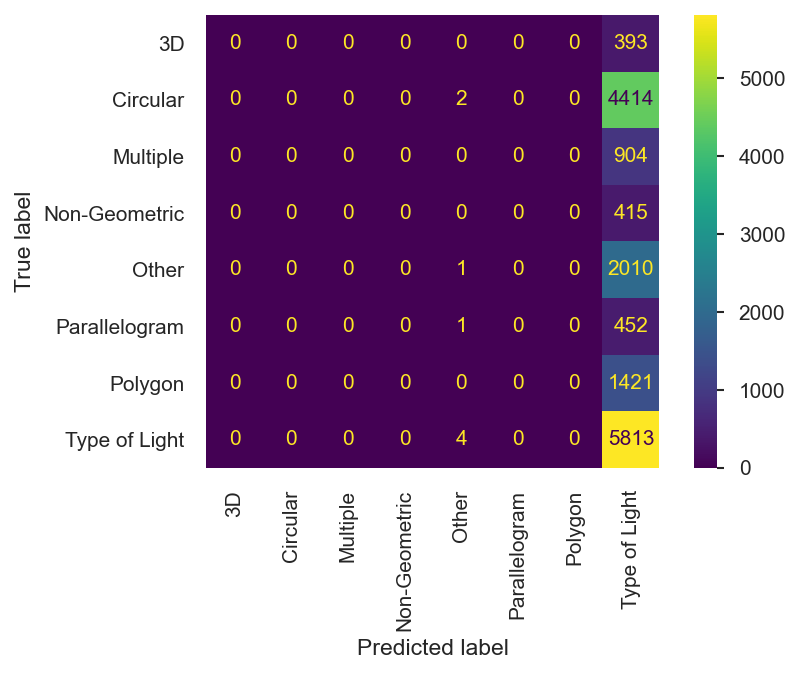

In [52]:
# Increase DPI to see the confussion matrix easier:
plt.rcParams['figure.dpi'] = 150

# Plot my confussion matrix:
plot_confusion_matrix(pipe, X_test, y_test, values_format='.0f', xticks_rotation='vertical');

In [53]:
# Look at the classification report:
print (classification_report(y_test, y_pred))

C:\Users\sahmj\OneDrive\Documents\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

           3D       0.00      0.00      0.00       393
     Circular       0.00      0.00      0.00      4416
     Multiple       0.00      0.00      0.00       904
Non-Geometric       0.00      0.00      0.00       415
        Other       0.12      0.00      0.00      2011
Parallelogram       0.00      0.00      0.00       453
      Polygon       0.00      0.00      0.00      1421
Type of Light       0.37      1.00      0.54      5817

     accuracy                           0.37     15830
    macro avg       0.06      0.12      0.07     15830
 weighted avg       0.15      0.37      0.20     15830



In [54]:
# Rearrange features and drop some features:
features = ['latitude', 'longitude', 'state', 'n_america', 'year', 'month', 'day', 'dow', 'hour', 
                    'durations_in_secs', 'craft', 'color', 'clear', 'dark', 'faded', 'pattern', 'formation', 'single', 
                    'trail', 'moves', 'follows', 'straight', 'changes', 'vanishes', 'quickly', 'fast', 'slow', 'stationary', 
                    'stopped', 'high', 'low', 'horizon', 'solid', 'long', 'small', 'speed', 'sound', 'shape_class']
train = train[features]
test = test[features]

# Check my work:
print (train.columns, '\n')
print (test.columns)

Index(['latitude', 'longitude', 'state', 'n_america', 'year', 'month', 'day',
       'dow', 'hour', 'durations_in_secs', 'craft', 'color', 'clear', 'dark',
       'faded', 'pattern', 'formation', 'single', 'trail', 'moves', 'follows',
       'straight', 'changes', 'vanishes', 'quickly', 'fast', 'slow',
       'stationary', 'stopped', 'high', 'low', 'horizon', 'solid', 'long',
       'small', 'speed', 'sound', 'shape_class'],
      dtype='object') 

Index(['latitude', 'longitude', 'state', 'n_america', 'year', 'month', 'day',
       'dow', 'hour', 'durations_in_secs', 'craft', 'color', 'clear', 'dark',
       'faded', 'pattern', 'formation', 'single', 'trail', 'moves', 'follows',
       'straight', 'changes', 'vanishes', 'quickly', 'fast', 'slow',
       'stationary', 'stopped', 'high', 'low', 'horizon', 'solid', 'long',
       'small', 'speed', 'sound', 'shape_class'],
      dtype='object')


In [ ]:
# Run the model with new features list:
# Create a features variable:
features = train.drop(columns=[target]).columns.tolist()

# Rearrange X feature matrices and y target vectors:
X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

# Make a pipeline for logistic regression:
pipe = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    LogisticRegression(random_state=97, solver='saga')
)

# Fit on train, score on test:
pipe.fit(X_train, y_train)
score = pipe.score(X_test, y_test)

# Predict on Test:
y_pred = pipe.predict(X_test)

# Look at the accuracy score:
print ('Basic Logistic Regression Accuracy Score:', score) 

In [ ]:
# Plot my confussion matrix again:
plot_confusion_matrix(pipe, X_test, y_test, values_format='.0f', xticks_rotation='vertical');

In [ ]:
# Look at the classification report again:
print (classification_report(y_test, y_pred))

In [ ]:
# Turn my new DataFrames into csv files for future use:
train.to_csv(r'C:\Users\sahmj\OneDrive\Documents\Lamda\Data Sets\ufo_train.csv', index=False)
test.to_csv(r'C:\Users\sahmj\OneDrive\Documents\Lamda\Data Sets\ufo_test.csv', index=False)